# Superconducting Qubit Refrigerator: Paper Plots
This Jupyter Notebook produces all plots in the manuscript relative to the superconducting qubit refrigerator if the ```paper_plot_data``` was downloaded. Such data can alternatively be generated using ```0_train.ipynb``` and ```1_produce_pareto.ipynb```. For details on the system, see ```0_train.ipynb```.
#### Import modules

In [2]:
import sys
import os
sys.path.append(os.path.join('..','src'))
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker
from matplotlib.lines import Line2D
from pathlib import Path
import plotting

## Produce all Paretos separately

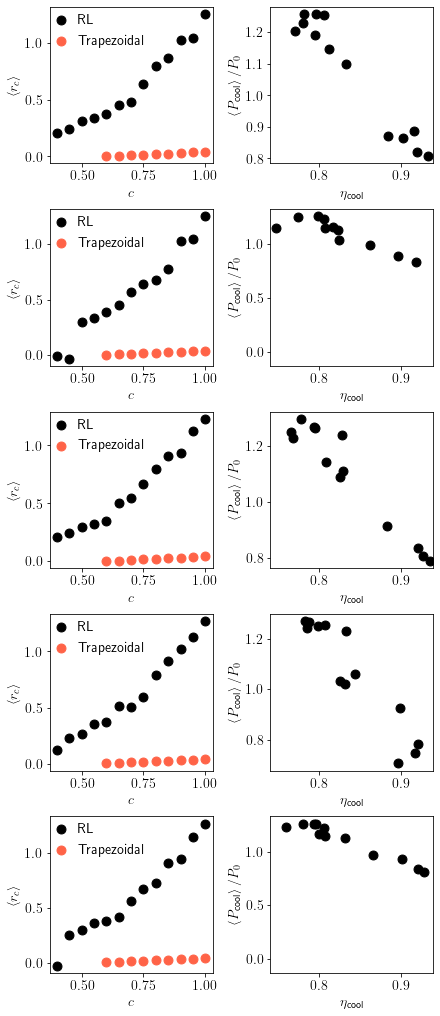

In [20]:
main_dir = "../paper_plot_data/exta_runs/qubit_refrigerator"

#plot settings
marker_size=80
custom_colors=["black"]

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath,amssymb,physics}'})

#prepare the data to plot
otto_pareto_file = os.path.join(main_dir,"otto_pareto.txt")
rl_pareto_files = [os.path.join(main_dir, subdir, "det_pareto.txt") for subdir in os.listdir(main_dir) if
                          os.path.isdir(os.path.join(main_dir,subdir))]

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6, 2.8*len(rl_pareto_files)))
gs = gridspec.GridSpec(len(rl_pareto_files), 2, figure=fig)
figmerit_axes = [fig.add_subplot(gs[i, 0]) for i in range(len(rl_pareto_files))]
pareto_axes = [fig.add_subplot(gs[i, 1]) for i in range(len(rl_pareto_files))]

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}


#load pareto data
otto_data = np.loadtxt(otto_pareto_file)
#each element in list is a numpy array loading corresponding train
rl_all_data = [np.loadtxt(file) for file in rl_pareto_files] 


#for each run 
for i, rl_data in enumerate(rl_all_data):
    
    #Figure of merit (left panels)
    figmerit_axes[i].scatter(rl_data[:,quantity_ind["a"]], rl_data[:,quantity_ind["h"]],
                        s=marker_size, marker="o", label="RL",c=custom_colors[0])
    figmerit_axes[i].scatter(otto_data[:,quantity_ind["a"]], otto_data[:,quantity_ind["h"]], s=marker_size,
                        marker="o",label="Trapezoidal",c="tomato") 
    figmerit_axes[i].set_xlabel(r"$c$")
    figmerit_axes[i].set_ylabel(r"$\ev{r_c}$")
    figmerit_axes[i].legend(framealpha=0., borderaxespad=0, handlelength=0.8)


    #Pareto front (panel b)
    pareto_axes[i].scatter(rl_data[:,quantity_ind["eff"]],rl_data[:,quantity_ind["pow"]],
                      s=marker_size, marker="o", label="RL",c=custom_colors[0])
    pareto_axes[i].set_xlabel(r"$\eta_{\text{cool}}$")
    pareto_axes[i].set_ylabel(r"$\ev*{P_\text{cool}}/P_0$")
    pareto_axes[i].set_xlim([0.74, 0.94])

#show
plt.show()

## Produce Pareto putting all points together

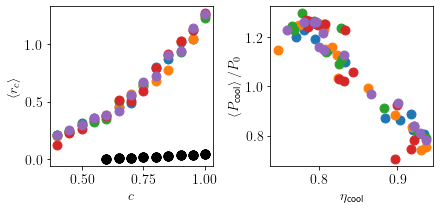

In [3]:
main_dir = "../paper_plot_data/exta_runs/qubit_refrigerator"

#plot settings
marker_size=80
custom_colors=["black"]

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath,amssymb,physics}'})

#prepare the data to plot
otto_pareto_file = os.path.join(main_dir,"otto_pareto.txt")
rl_pareto_files = [os.path.join(main_dir, subdir, "det_pareto.txt") for subdir in os.listdir(main_dir) if
                          os.path.isdir(os.path.join(main_dir,subdir))]

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6, 2.8))
gs = gridspec.GridSpec(1, 2, figure=fig)
figmerit_ax = fig.add_subplot(gs[0, 0]) 
pareto_ax = fig.add_subplot(gs[0, 1]) 

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#load pareto data
otto_data = np.loadtxt(otto_pareto_file)
#each element in list is a numpy array loading corresponding train
rl_all_data = [np.loadtxt(file) for file in rl_pareto_files] 

#for each run 
for i, rl_data in enumerate(rl_all_data):
    
    #Figure of merit (left panels)
    figmerit_ax.scatter(rl_data[:,quantity_ind["a"]], rl_data[:,quantity_ind["h"]],
                        s=marker_size, marker="o", label="RL")
    figmerit_ax.scatter(otto_data[:,quantity_ind["a"]], otto_data[:,quantity_ind["h"]], s=marker_size,
                        marker="o",label="Trapezoidal",c="black") 
    figmerit_ax.set_xlabel(r"$c$")
    figmerit_ax.set_ylabel(r"$\ev{r_c}$")
    
    #Pareto front (panel b)
    pareto_ax.scatter(rl_data[:,quantity_ind["eff"]],rl_data[:,quantity_ind["pow"]],
                      s=marker_size, marker="o", label="RL")
    pareto_ax.set_xlabel(r"$\eta_{\text{cool}}$")
    pareto_ax.set_ylabel(r"$\ev*{P_\text{cool}}/P_0$")
    #pareto_ax.set_xlim([0.74, 0.94])
    #pareto_ax.set_ylim([0.65, 1.32])
    

#show
plt.show()

# One color for each a value

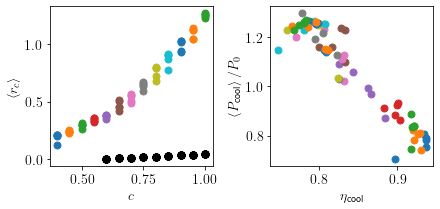

In [19]:
main_dir = "../paper_plot_data/exta_runs/qubit_refrigerator"

#plot settings
marker_size=80*3/5
custom_colors=["black"]

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath,amssymb,physics}'})

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#prepare the data to plot
otto_pareto_file = os.path.join(main_dir,"otto_pareto.txt")
rl_pareto_files = [os.path.join(main_dir, subdir, "det_pareto.txt") for subdir in os.listdir(main_dir) if
                          os.path.isdir(os.path.join(main_dir,subdir))]

#load otto data
otto_data = np.loadtxt(otto_pareto_file)

#sort each file by the value of the weight
rl_all_data = []
for i, rl_file in enumerate(rl_pareto_files):
    rl_data = np.loadtxt(rl_file)
    rl_all_data.append(rl_data[rl_data[:, quantity_ind['a']].argsort()])
#put everything in a big numpy array
rl_all_data = np.array(rl_all_data)
    
#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6, 2.8))
gs = gridspec.GridSpec(1, 2, figure=fig)
figmerit_ax = fig.add_subplot(gs[0, 0]) 
pareto_ax = fig.add_subplot(gs[0, 1]) 


#for each value of the weight 
for i in range(rl_all_data.shape[1]):
    
    #Figure of merit (left panels)
    figmerit_ax.scatter(rl_all_data[:,i,quantity_ind["a"]], rl_all_data[:,i,quantity_ind["h"]],
                        s=marker_size, marker="o", label="RL")
    figmerit_ax.scatter(otto_data[:,quantity_ind["a"]], otto_data[:,quantity_ind["h"]], s=marker_size,
                        marker="o",label="Trapezoidal",c="black") 
    figmerit_ax.set_xlabel(r"$c$")
    figmerit_ax.set_ylabel(r"$\ev{r_c}$")
    #figmerit_ax.legend(framealpha=0., borderaxespad=0, handlelength=0.8)

    #Pareto front (panel b)
    pareto_ax.scatter(rl_all_data[:,i,quantity_ind["eff"]],rl_all_data[:,i,quantity_ind["pow"]],
                      s=marker_size, marker="o", label="RL")
    pareto_ax.set_xlabel(r"$\eta_{\text{cool}}$")
    pareto_ax.set_ylabel(r"$\ev*{P_\text{cool}}/P_0$")
    #pareto_ax.set_xlim([0.74, 0.94])

#show
plt.show()


## Try to do final plot

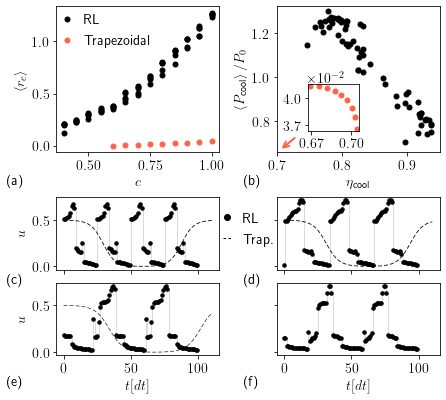

In [48]:
main_dir = "../paper_plot_data/exta_runs/qubit_refrigerator"
main_dir_old = "../paper_plot_data/qubit_refrigerator/pareto/"

cycle_0_file = os.path.join(main_dir_old, "2022_01_27-17_40_09_aend=1.0/saved_policies/det_policy.txt")
cycle_1_file = os.path.join(main_dir_old, "2022_01_28-10_06_53_aend=0.8/saved_policies/det_policy.txt")
cycle_2_file = os.path.join(main_dir_old, "2022_01_28-15_42_10_aend=0.6/saved_policies/det_policy.txt")
cycle_3_file = os.path.join(main_dir_old, "2022_01_21-18_39_30_aend=0.4/saved_policies/det_policy.txt")
selected_cycle_cvals = [1.,0.8,0.6,0.4]
actions_to_plot = 100 
actions_line_style = "scatter_plot"
marker_size=25
actions_ylim = None
prot_linewidth = 12
extra_cycles_linewidth = 1.5
custom_colors=["black"]
inset_position = [0.687,0.675,0.12,0.12]
extra_cycles_0 = [lambda x,a=2,omega=0.05475,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_0 = 0.8
extra_cycles_1 = [lambda x,a=2,omega=0.0512239,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_1 = 0.8
extra_cycles_2 = [lambda x,a=2,omega=0.0472428,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_2 = 0.6
rl_legend_lines=[Line2D([0], [0], color='black', linewidth=0, marker="o"), 
                    Line2D([0], [0], color='black', linewidth=1, dashes=(2/0.8,2/0.8))]
rl_legend_text=["RL","Trap."]
rl_legend_location=[0.487,0.37]
legend_column_spacing = 0.5
plot_file_name = "fig_4.pdf"

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath,amssymb,physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,5.45))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios = [1.8,0.9,0.9])
figmerit_ax = fig.add_subplot(gs[0, 0])
pareto_ax = fig.add_subplot(gs[0, 1])
prot_0_ax = fig.add_subplot(gs[1, 0])
prot_1_ax = fig.add_subplot(gs[1, 1],sharey=prot_0_ax)
prot_2_ax = fig.add_subplot(gs[2, 0],sharex=prot_0_ax)
prot_3_ax = fig.add_subplot(gs[2, 1],sharey=prot_2_ax, sharex=prot_1_ax)
plt.setp(prot_1_ax.get_yticklabels(), visible=False)
plt.setp(prot_3_ax.get_yticklabels(), visible=False)          
plt.setp(prot_0_ax.get_xticklabels(), visible=False)
plt.setp(prot_1_ax.get_xticklabels(), visible=False)          

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#load data for plotting
otto_pareto_file = os.path.join(main_dir,"otto_pareto.txt")
rl_pareto_files = [os.path.join(main_dir, subdir, "det_pareto.txt") for subdir in os.listdir(main_dir) if
                          os.path.isdir(os.path.join(main_dir,subdir))]
otto_data = np.loadtxt(otto_pareto_file)
#sort each file by the value of the weight
rl_all_data = []
for i, rl_file in enumerate(rl_pareto_files):
    rl_data = np.loadtxt(rl_file)
    rl_all_data.append(rl_data[rl_data[:, quantity_ind['a']].argsort()])
#put everything in a big numpy array
rl_all_data = np.array(rl_all_data)

    
#Figure of merit (panel a)
figmerit_ax.scatter(rl_all_data[:,:,quantity_ind["a"]].reshape(-1), rl_all_data[:,:,quantity_ind["h"]].reshape(-1),
                    s=marker_size, marker="o", label="RL", c="black")
figmerit_ax.scatter(otto_data[:,quantity_ind["a"]], otto_data[:,quantity_ind["h"]], s=marker_size,
                    marker="o",label="Trapezoidal",c="tomato") 
figmerit_ax.set_xlabel(r"$c$")
figmerit_ax.set_ylabel(r"$\ev{r_c}$")
figmerit_ax.legend(framealpha=0., borderaxespad=0, handlelength=0.8)

#Pareto front (panel b)
pareto_ax.scatter(rl_all_data[:,:,quantity_ind["eff"]].reshape(-1),rl_all_data[:,:,quantity_ind["pow"]].reshape(-1),
                  s=marker_size, marker="o", label="RL", c="black")
pareto_ax.set_xlabel(r"$\eta_{\text{cool}}$")
pareto_ax.set_ylabel(r"$\ev*{P_\text{cool}}/P_0$")
pareto_ax.set_xlim([0.7, 0.95])
pareto_ax.set_ylim([0.66, 1.32])
pareto_ax.annotate('',xytext=(0.73,0.73),xycoords='data',xy=(0.705,0.67),textcoords='data',size=14,
                   arrowprops=dict(arrowstyle='->',linewidth=2.,color='tomato'))

#Pareto fronnt inset (inset in panel b)
pareto_inset = fig.add_axes(inset_position)
pareto_inset.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) 
pareto_inset.scatter(otto_data[:,quantity_ind["eff"]],otto_data[:,quantity_ind["pow"]], s=marker_size,
                  marker="o", label="Otto",c="tomato")
pareto_inset.set_xticks([0.67,0.7])
pareto_inset.set_yticks([3.7e-2,4.0e-2])


#first protocol (panel c)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False,k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_0,
                                extra_cycles_linewidth=extra_cycles_linewidth_0,hide_gray_vertical_line=False,
                                hide_xaxis_label=True,line_style=actions_line_style)

#second protocol (panel d)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_1,
                                extra_cycles_linewidth=extra_cycles_linewidth_1,hide_gray_vertical_line=False,
                                hide_xaxis_label=True,hide_yaxis_label=True,line_style=actions_line_style)

#second protocol (panel e)
plotting.plot_actions_on_axis(cycle_2_file, prot_2_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_2,
                                extra_cycles_linewidth=extra_cycles_linewidth_2,hide_gray_vertical_line=False,
                                line_style=actions_line_style)

#second protocol (panel f)
plotting.plot_actions_on_axis(cycle_3_file, prot_3_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",hide_gray_vertical_line=False,
                                hide_yaxis_label=True,line_style=actions_line_style)

#legend
fig.legend(rl_legend_lines,rl_legend_text,loc=rl_legend_location,fancybox=False, framealpha=0.,borderaxespad=0.,
                    ncol=1,handlelength=0.6, columnspacing=legend_column_spacing)

#extra labels
# figmerit_ax.text(0.04,0.05, r"(f)", transform=figmerit_ax.transAxes)
# figmerit_ax.text(0.36,0.20, r"(e)", transform=figmerit_ax.transAxes)
# figmerit_ax.text(0.69,0.47, r"(d)", transform=figmerit_ax.transAxes)
# figmerit_ax.text(0.91,0.8, r"(c)", transform=figmerit_ax.transAxes)
# # pareto_ax.text(0.81,0.04, r"(f)", transform=pareto_ax.transAxes)
# pareto_ax.text(0.632,0.22, r"(e)", transform=pareto_ax.transAxes)
# pareto_ax.text(0.22,0.68, r"(d)", transform=pareto_ax.transAxes)
# pareto_ax.text(0.05,0.91, r"(c)", transform=pareto_ax.transAxes)

# panel numbering labels
fig.text(-0.3,-0.22, r"(a)",transform=figmerit_ax.transAxes)
fig.text(-0.2,-0.22, r"(b)",transform=pareto_ax.transAxes)
fig.text(-0.3,-0.19, r"(c)",transform=prot_0_ax.transAxes)
fig.text(-0.2,-0.19, r"(d)",transform=prot_1_ax.transAxes)
fig.text(-0.3,-0.42, r"(e)",transform=prot_2_ax.transAxes)
fig.text(-0.2,-0.42, r"(f)",transform=prot_3_ax.transAxes)

#save figure
plt.savefig(plot_file_name)
#show
plt.show()

## Adding error bars to figure of merit

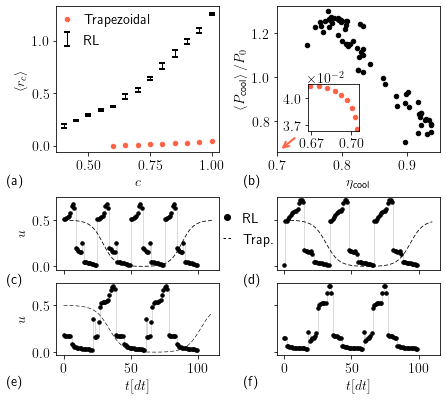

In [108]:
main_dir = "../paper_plot_data/exta_runs/qubit_refrigerator"
main_dir_old = "../paper_plot_data/qubit_refrigerator/pareto/"

cycle_0_file = os.path.join(main_dir_old, "2022_01_27-17_40_09_aend=1.0/saved_policies/det_policy.txt")
cycle_1_file = os.path.join(main_dir_old, "2022_01_28-10_06_53_aend=0.8/saved_policies/det_policy.txt")
cycle_2_file = os.path.join(main_dir_old, "2022_01_28-15_42_10_aend=0.6/saved_policies/det_policy.txt")
cycle_3_file = os.path.join(main_dir_old, "2022_01_21-18_39_30_aend=0.4/saved_policies/det_policy.txt")
selected_cycle_cvals_index = [12, 8, 4, 0]  #these correspond to c_values of [1.,0.8,0.6,0.4]
selected_cycle_repetition_index = [2,1,0,3]
actions_to_plot = 100 
actions_line_style = "scatter_plot"
marker_size=20
actions_ylim = None
prot_linewidth = 12
extra_cycles_linewidth = 1.5
custom_colors=["black"]
inset_position = [0.687,0.675,0.12,0.12]
extra_cycles_0 = [lambda x,a=2,omega=0.05475,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_0 = 0.8
extra_cycles_1 = [lambda x,a=2,omega=0.0512239,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_1 = 0.8
extra_cycles_2 = [lambda x,a=2,omega=0.0472428,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_2 = 0.6
rl_legend_lines=[Line2D([0], [0], color='black', linewidth=0, marker="o"), 
                    Line2D([0], [0], color='black', linewidth=1, dashes=(2/0.8,2/0.8))]
rl_legend_text=["RL","Trap."]
rl_legend_location=[0.487,0.37]
legend_column_spacing = 0.5
plot_file_name = "fig_4.pdf"

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath,amssymb,physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,5.45))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios = [1.8,0.9,0.9])
figmerit_ax = fig.add_subplot(gs[0, 0])
pareto_ax = fig.add_subplot(gs[0, 1])
prot_0_ax = fig.add_subplot(gs[1, 0])
prot_1_ax = fig.add_subplot(gs[1, 1],sharey=prot_0_ax)
prot_2_ax = fig.add_subplot(gs[2, 0],sharex=prot_0_ax)
prot_3_ax = fig.add_subplot(gs[2, 1],sharey=prot_2_ax, sharex=prot_1_ax)
plt.setp(prot_1_ax.get_yticklabels(), visible=False)
plt.setp(prot_3_ax.get_yticklabels(), visible=False)          
plt.setp(prot_0_ax.get_xticklabels(), visible=False)
plt.setp(prot_1_ax.get_xticklabels(), visible=False)          

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#load data for plotting
otto_pareto_file = os.path.join(main_dir,"otto_pareto.txt")
rl_pareto_files = [os.path.join(main_dir, subdir, "det_pareto.txt") for subdir in os.listdir(main_dir) if
                          os.path.isdir(os.path.join(main_dir,subdir))]
otto_data = np.loadtxt(otto_pareto_file)
#sort each file by the value of the weight
rl_all_data = []
for i, rl_file in enumerate(rl_pareto_files):
    rl_data = np.loadtxt(rl_file)
    rl_all_data.append(rl_data[rl_data[:, quantity_ind['a']].argsort()])
#put everything in a big numpy array
rl_all_data = np.array(rl_all_data)

    
#Figure of merit (panel a)
figmerit_ax.errorbar(rl_all_data[0,:,quantity_ind["a"]], np.mean(rl_all_data[:,:,quantity_ind["h"]], axis=0),
                    yerr=0.5*np.std(rl_all_data[:,:,quantity_ind["h"]], axis=0,ddof=1),markersize=0, fmt="o",
                     label="RL", c="black", capsize=3, linewidth=1, capthick=2)
figmerit_ax.scatter(otto_data[:,quantity_ind["a"]], otto_data[:,quantity_ind["h"]], s=marker_size,
                    marker="o",label="Trapezoidal",c="tomato") 
figmerit_ax.set_xlabel(r"$c$")
figmerit_ax.set_ylabel(r"$\ev{r_c}$")
figmerit_ax.legend(framealpha=0., borderaxespad=0, handlelength=0.8)

#Pareto front (panel b)
pareto_ax.scatter(rl_all_data[:,:,quantity_ind["eff"]].reshape(-1),rl_all_data[:,:,quantity_ind["pow"]].reshape(-1),
                  s=marker_size, marker="o", label="RL", c="black")
pareto_ax.set_xlabel(r"$\eta_{\text{cool}}$")
pareto_ax.set_ylabel(r"$\ev*{P_\text{cool}}/P_0$")
pareto_ax.set_xlim([0.7, 0.95])
pareto_ax.set_ylim([0.66, 1.32])
pareto_ax.annotate('',xytext=(0.73,0.73),xycoords='data',xy=(0.705,0.67),textcoords='data',size=14,
                   arrowprops=dict(arrowstyle='->',linewidth=2.,color='tomato'))

#Pareto fronnt inset (inset in panel b)
pareto_inset = fig.add_axes(inset_position)
pareto_inset.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) 
pareto_inset.scatter(otto_data[:,quantity_ind["eff"]],otto_data[:,quantity_ind["pow"]], s=marker_size,
                  marker="o", label="Otto",c="tomato")
pareto_inset.set_xticks([0.67,0.7])
pareto_inset.set_yticks([3.7e-2,4.0e-2])


#first protocol (panel c)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False,k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_0,
                                extra_cycles_linewidth=extra_cycles_linewidth_0,hide_gray_vertical_line=False,
                                hide_xaxis_label=True,line_style=actions_line_style)

#second protocol (panel d)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_1,
                                extra_cycles_linewidth=extra_cycles_linewidth_1,hide_gray_vertical_line=False,
                                hide_xaxis_label=True,hide_yaxis_label=True,line_style=actions_line_style)

#second protocol (panel e)
plotting.plot_actions_on_axis(cycle_2_file, prot_2_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_2,
                                extra_cycles_linewidth=extra_cycles_linewidth_2,hide_gray_vertical_line=False,
                                line_style=actions_line_style)

#second protocol (panel f)
plotting.plot_actions_on_axis(cycle_3_file, prot_3_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",hide_gray_vertical_line=False,
                                hide_yaxis_label=True,line_style=actions_line_style)

#legend
fig.legend(rl_legend_lines,rl_legend_text,loc=rl_legend_location,fancybox=False, framealpha=0.,borderaxespad=0.,
                    ncol=1,handlelength=0.6, columnspacing=legend_column_spacing)

#extra labels
# figmerit_ax.text(0.04,0.05, r"(f)", transform=figmerit_ax.transAxes)
# figmerit_ax.text(0.36,0.20, r"(e)", transform=figmerit_ax.transAxes)
# figmerit_ax.text(0.69,0.47, r"(d)", transform=figmerit_ax.transAxes)
# figmerit_ax.text(0.91,0.8, r"(c)", transform=figmerit_ax.transAxes)
# # pareto_ax.text(0.81,0.04, r"(f)", transform=pareto_ax.transAxes)
# pareto_ax.text(0.632,0.22, r"(e)", transform=pareto_ax.transAxes)
# pareto_ax.text(0.22,0.68, r"(d)", transform=pareto_ax.transAxes)
# pareto_ax.text(0.05,0.91, r"(c)", transform=pareto_ax.transAxes)

# panel numbering labels
fig.text(-0.3,-0.22, r"(a)",transform=figmerit_ax.transAxes)
fig.text(-0.2,-0.22, r"(b)",transform=pareto_ax.transAxes)
fig.text(-0.3,-0.19, r"(c)",transform=prot_0_ax.transAxes)
fig.text(-0.2,-0.19, r"(d)",transform=prot_1_ax.transAxes)
fig.text(-0.3,-0.42, r"(e)",transform=prot_2_ax.transAxes)
fig.text(-0.2,-0.42, r"(f)",transform=prot_3_ax.transAxes)

#save figure
plt.savefig(plot_file_name)
#show
plt.show()

## Highlighting the selected cycles

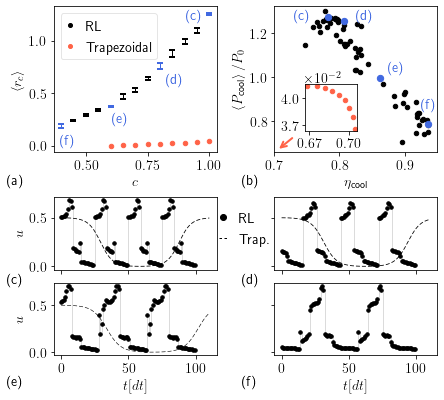

In [146]:
main_dir = "../paper_plot_data/exta_runs/qubit_refrigerator"

cycle_0_file = os.path.join(main_dir, "4/2022_03_11-11_50_21_aend=1.0/saved_policies/det_policy.txt")
cycle_1_file = os.path.join(main_dir, "1/2022_02_25-16_07_12_aend=0.8/saved_policies/det_policy.txt")
cycle_2_file = os.path.join(main_dir, "2/2022_02_26-23_03_54_aend=0.6/saved_policies/det_policy.txt")
cycle_3_file = os.path.join(main_dir, "3/2022_03_01-10_08_57_aend=0.4/saved_policies/det_policy.txt")
selected_cycle_cvals_index = [12, 8, 4, 0]  #these correspond to c_values of [1.,0.8,0.6,0.4]
selected_cycle_repetition_index = [3,0, 1, 2]
actions_to_plot = 100 
actions_line_style = "scatter_plot"
marker_size=20
prot_linewidth = 12
extra_cycles_linewidth = 1.5
custom_colors=["black"]
inset_position = [0.687,0.675,0.12,0.12]
extra_cycles_0 = [lambda x,a=2,omega=0.05475,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_0 = 0.8
extra_cycles_1 = [lambda x,a=2,omega=0.0512239,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_1 = 0.8
extra_cycles_2 = [lambda x,a=2,omega=0.0472428,dt=0.982: 0.25*(1. + np.tanh(a*np.cos(omega*x*dt))/np.tanh(a)),
               [0,110],"black"]
extra_cycles_linewidth_2 = 0.6
rl_legend_lines=[Line2D([0], [0], color='black', linewidth=0, marker="o"), 
                    Line2D([0], [0], color='black', linewidth=1, dashes=(2/0.8,2/0.8))]
rl_legend_text=["RL","Trap."]
rl_legend_location=[0.48,0.37]
legend_column_spacing = 0.5
plot_file_name = "fig_4.pdf"

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath,amssymb,physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,5.45))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios = [1.8,0.9,0.9])
figmerit_ax = fig.add_subplot(gs[0, 0])
pareto_ax = fig.add_subplot(gs[0, 1])
prot_0_ax = fig.add_subplot(gs[1, 0])
prot_1_ax = fig.add_subplot(gs[1, 1],sharey=prot_0_ax)
prot_2_ax = fig.add_subplot(gs[2, 0],sharex=prot_0_ax)
prot_3_ax = fig.add_subplot(gs[2, 1],sharey=prot_2_ax, sharex=prot_1_ax)
plt.setp(prot_1_ax.get_yticklabels(), visible=False)
plt.setp(prot_3_ax.get_yticklabels(), visible=False)          
plt.setp(prot_0_ax.get_xticklabels(), visible=False)
plt.setp(prot_1_ax.get_xticklabels(), visible=False)          

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#load data for plotting
otto_pareto_file = os.path.join(main_dir,"otto_pareto.txt")
rl_pareto_files = [os.path.join(main_dir, subdir, "det_pareto.txt") for subdir in os.listdir(main_dir) if
                          os.path.isdir(os.path.join(main_dir,subdir))]
otto_data = np.loadtxt(otto_pareto_file)
#sort each file by the value of the weight
rl_all_data = []
for i, rl_file in enumerate(rl_pareto_files):
    rl_data = np.loadtxt(rl_file)
    rl_all_data.append(rl_data[rl_data[:, quantity_ind['a']].argsort()])
#put everything in a big numpy array
rl_all_data = np.array(rl_all_data)
#create index of non-selected c-vals
non_selected_cycle_cvals_index = [i for i in range(rl_all_data.shape[1]) if not i in selected_cycle_cvals_index]  
    
#Figure of merit (panel a)
figmerit_ax.errorbar(rl_all_data[0,non_selected_cycle_cvals_index,quantity_ind["a"]],
                     np.mean(rl_all_data[:,non_selected_cycle_cvals_index,quantity_ind["h"]], axis=0),
                    yerr=0.5*np.std(rl_all_data[:,non_selected_cycle_cvals_index,quantity_ind["h"]], axis=0,ddof=1),
                     markersize=0, fmt="o", label="RL", c="black", capsize=3, linewidth=1, capthick=2)
figmerit_ax.errorbar(rl_all_data[0,selected_cycle_cvals_index,quantity_ind["a"]],
                     np.mean(rl_all_data[:,selected_cycle_cvals_index,quantity_ind["h"]], axis=0),
                    yerr=0.5*np.std(rl_all_data[:,selected_cycle_cvals_index,quantity_ind["h"]], axis=0,ddof=1),
                     markersize=0, fmt="o", c="royalblue", capsize=3, linewidth=1, capthick=2)
figmerit_ax.scatter(otto_data[:,quantity_ind["a"]], otto_data[:,quantity_ind["h"]], s=marker_size,
                    marker="o",label="Trapezoidal",c="tomato") 
figmerit_ax.set_xlabel(r"$c$")
figmerit_ax.set_ylabel(r"$\ev{r_c}$")
#figmerit_ax.legend(framealpha=0., borderaxespad=0, handlelength=0.8)
figmerit_ax.legend([Line2D([0], [0], color='black', linewidth=0, marker="o", markersize=4), 
            Line2D([0], [0], color='tomato', linewidth=0, marker="o", markersize=4)],
            ["RL","Trapezoidal"], framealpha=0.5, fancybox=True, handlelength=0.6)



#Pareto front (panel b)
pareto_ax.scatter(rl_all_data[:,:,quantity_ind["eff"]].reshape(-1),rl_all_data[:,:,quantity_ind["pow"]].reshape(-1),
                  s=marker_size, marker="o", label="RL", c="black")
pareto_ax.scatter(rl_all_data[selected_cycle_repetition_index,selected_cycle_cvals_index,quantity_ind["eff"]],
                  rl_all_data[selected_cycle_repetition_index,selected_cycle_cvals_index,quantity_ind["pow"]],
                  s=marker_size*2, marker="o", label="RL", c="royalblue")
pareto_ax.set_xlabel(r"$\eta_{\text{cool}}$")
pareto_ax.set_ylabel(r"$\ev*{P_\text{cool}}/P_0$")
pareto_ax.set_xlim([0.7, 0.95])
pareto_ax.set_ylim([0.66, 1.32])
pareto_ax.annotate('',xytext=(0.73,0.73),xycoords='data',xy=(0.705,0.67),textcoords='data',size=14,
                   arrowprops=dict(arrowstyle='->',linewidth=2.,color='tomato'))

#Pareto fronnt inset (inset in panel b)
pareto_inset = fig.add_axes(inset_position)
pareto_inset.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) 
pareto_inset.scatter(otto_data[:,quantity_ind["eff"]],otto_data[:,quantity_ind["pow"]], s=marker_size,
                  marker="o", label="Otto",c="tomato")
pareto_inset.set_xticks([0.67,0.7])
pareto_inset.set_yticks([3.7e-2,4.0e-2])


#first protocol (panel c)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False,k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_0,
                                extra_cycles_linewidth=extra_cycles_linewidth_0,hide_gray_vertical_line=False,
                                hide_xaxis_label=True,line_style=actions_line_style)

#second protocol (panel d)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_1,
                                extra_cycles_linewidth=extra_cycles_linewidth_1,hide_gray_vertical_line=False,
                                hide_xaxis_label=True,hide_yaxis_label=True,line_style=actions_line_style)

#second protocol (panel e)
plotting.plot_actions_on_axis(cycle_2_file, prot_2_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",extra_cycles=extra_cycles_2,
                                extra_cycles_linewidth=extra_cycles_linewidth_2,hide_gray_vertical_line=False,
                                line_style=actions_line_style)

#second protocol (panel f)
plotting.plot_actions_on_axis(cycle_3_file, prot_3_ax, actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=False, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[dt]$",hide_gray_vertical_line=False,
                                hide_yaxis_label=True,line_style=actions_line_style)

#legend
fig.legend(rl_legend_lines,rl_legend_text,loc=rl_legend_location,fancybox=False, framealpha=0.,borderaxespad=0.,
                    ncol=1,handlelength=0.6, columnspacing=legend_column_spacing)

#extra labels
figmerit_ax.text(0.04,0.05, r"(f)", transform=figmerit_ax.transAxes, color="royalblue")
figmerit_ax.text(0.36,0.20, r"(e)", transform=figmerit_ax.transAxes, color="royalblue")
figmerit_ax.text(0.69,0.47, r"(d)", transform=figmerit_ax.transAxes, color="royalblue")
figmerit_ax.text(0.81,0.91, r"(c)", transform=figmerit_ax.transAxes, color="royalblue")
pareto_ax.text(0.899,0.3, r"(f)", transform=pareto_ax.transAxes, color="royalblue")
pareto_ax.text(0.7,0.55, r"(e)", transform=pareto_ax.transAxes, color="royalblue")
pareto_ax.text(0.5,0.91, r"(d)", transform=pareto_ax.transAxes, color="royalblue")
pareto_ax.text(0.12,0.91, r"(c)", transform=pareto_ax.transAxes, color="royalblue")

# panel numbering labels
fig.text(-0.285,-0.22, r"(a)",transform=figmerit_ax.transAxes)
fig.text(-0.2,-0.22, r"(b)",transform=pareto_ax.transAxes)
fig.text(-0.285,-0.19, r"(c)",transform=prot_0_ax.transAxes)
fig.text(-0.2,-0.19, r"(d)",transform=prot_1_ax.transAxes)
fig.text(-0.285,-0.42, r"(e)",transform=prot_2_ax.transAxes)
fig.text(-0.2,-0.42, r"(f)",transform=prot_3_ax.transAxes)

#save figure
plt.savefig(plot_file_name)
#show
plt.show()